# 시계열 예측

## 정상성
##### 시계열분석(Time Series Analysis)을 위해서는 정상성(Stationary)을 만족해야 한다.
##### 정상성
* 평균이 일정하다.
* 분산이 시점에 의존하지 않는다.
* 공분산은 단지 시차에만 의존하고 시점 자체에는 의존하지 않는다.

위에서 정의한 정상성 조건을 하나라도 만족하지 못하는 경우의 시계열 자료를 비정상 시계열이라고 부르며, 대부분의 시계열 자료는 비정상 시계열 자료이다. 비정상 시계열 자료는 정상성을 만족하도록 데이터를 정상 시계열 자료로 만든 후에 시계열 분석을 수행한다.

시계열 자료가 정상성을 만족하는지 판단하는 과정이 필요하다.
##### 이상점(Outlier)과 개입(Intervention)을 살피고, 정상성 만족 여부와 개략적인 추세 유무를 관찰한다.
* 이상점(Outlier)의 경우 일반적으로 이상값을 제거한다.
* 개입(Intervention)의 경우 회귀분석을 수행한다.
* 추세를 보이는(평균이 일정하지 않은) 경우 차분(Difference)을 통해 비정상 시계열을 정상 시계열로 바꾼다.
* 시간에 따라 분산이 일정하지 않은 경우 변환(Transformation)을 통해서 정상 시계열로 바꿀수 있다.

##### 차분이란 현 시점의 자료값에서 전 시점의 자료값을 빼는 것을 말한다.
여러시점 전의 자료를 빼는 것을 계절차분이라고 한다. 계절성을 갖는 비정상 시계열을 정상 시계열로 바꿀 때 계절차분을 사용한다.

## 시계열 모형

### 자기회귀 모형(AR 모형)
##### 자기회귀모형(Autoregressive model)은 현 시점의 자료가 p 시점 전의 유한개의 과거 자료로 설명될 수 있다는 의미이며 AR(p) 모형이라 한다.

자기회귀모형은 현 시점의 시계열 자료에 몇번째 전 자료까지 영향을 주는지 알아내는데 있다. 현 시점의 시계열 자료에서 과거 1시점 이전의 자료만 영향을 준다면, 이를 1차 자기회귀모형이라고 하며 AR(1)모형이라 한다.

현 시점의 시계열 자료에 과거 2시점 전 자료까지 영향을 주는 모형을 2차 자기모형이라고 한다.

자기회귀모형인지 판단하기 위한 모형 식별을 위해서 자료에서 자기상관함수(ACF, Auto-Correlation Function)과 부분자기상관함수(PACF, Partial Auto-Correlation Function)을 이용하여 식별한다.

일반적으로 자기회귀모형은 자기상관함수는 시차가 증가함에 따라 점차적으로 감소하고,
부분자기상관함수는 p+1 시차 이후 급격히 감소하여 절단된 형태이며, 이를 AR(p) 모형이라고 판별한다.

### 이동평균모형(MA 모형)
##### 이동평균모형(Moving Average model)은 현 시점의 자료를 유한개의 백색잡음의 선형결합으로 표현되었기 때문에 항상 정상성을 만족한다.

이동평균모형을 판단하기 위한 모형 식별은 자기회귀모형과 마찬가지로 자기상관함수와 부분자기상관함수를 이용하여 식별하게 된다.
이동편균모형은 자기회귀모형과 반대로 자기상관함수는 p+1 시차 이후 절단된 형태가 되고, 이때를 MA(p) 모형이라 볼수 있다.
그리고 부분자기상관함수는 점차 감소하는 형태를 띄게 된다.

### 자기회귀누적이동평균모형(ARIMA 모형)
##### ARIMA(Autoregressive Integrated Moving Average model) 모형은 기본적으로 비정상 시계혈 모형이기 때문에 차분이나 변환을 통해 AR 모형이나 MA 모형, ARMA 모형으로 정상화할 수 있다.

* d=0이면 ARMA(p,q) 모형이라 부르고, 이 모형은 정상성을 만족한다.
* p=o이면 IMA(d,q) 모형이라 부르고, 이 모형을 d번 차분하면 MA(q) 모형이 된다.
* q=0이면 ARI(p,d)모형이며, 이를 d번 차분한 시계열 모형이 AR(p) 모형을 따르게 된다.

### 분해 시계열
##### 분해 시계열이란 시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법을 말한다.

##### 시계열을 구성하는 요소는 다음 4가지로 분류된다.
* 추세요인
* 계절요인
* 순환요인
* 불규칙요인

## SAMPLE

### 시계열 자료
#### 시계열 자료 불러오기
다음은 1871년도부터 1970년도까지 아스완 댐에서 측정한 나일강의 연간 유입량에 관한 시계열 데이터다.

In [4]:
Nile

A Time Series:
  [1] 1120 1160  963 1210 1160 1160  813 1230 1370 1140  995  935 1110  994 1020
 [16]  960 1180  799  958 1140 1100 1210 1150 1250 1260 1220 1030 1100  774  840
 [31]  874  694  940  833  701  916  692 1020 1050  969  831  726  456  824  702
 [46] 1120 1100  832  764  821  768  845  864  862  698  845  744  796 1040  759
 [61]  781  865  845  944  984  897  822 1010  771  676  649  846  812  742  801
 [76] 1040  860  874  848  890  744  749  838 1050  918  986  797  923  975  815
 [91] 1020  906  901 1170  912  746  919  718  714  740

다음 데이터는 1974년부터 1979년까지의 영국 내의 월별 폐질환 사망자에 관한 시계열 자료다.

In [7]:
ldeaths

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1974,3035,2552,2704,2554,2014,1655,1721,1524,1596,2074,2199,2512
1975,2933,2889,2938,2497,1870,1726,1607,1545,1396,1787,2076,2837
1976,2787,3891,3179,2011,1636,1580,1489,1300,1356,1653,2013,2823
1977,3102,2294,2385,2444,1748,1554,1498,1361,1346,1564,1640,2293
1978,2815,3137,2679,1969,1870,1633,1529,1366,1357,1570,1535,2491
1979,3084,2605,2573,2143,1693,1504,1461,1354,1333,1492,1781,1915


#### 그림 고찰
나일강 연간 유입량, 영국 폐질환 사망자 데이터를 plot 함수를 이용하여 그려본다.

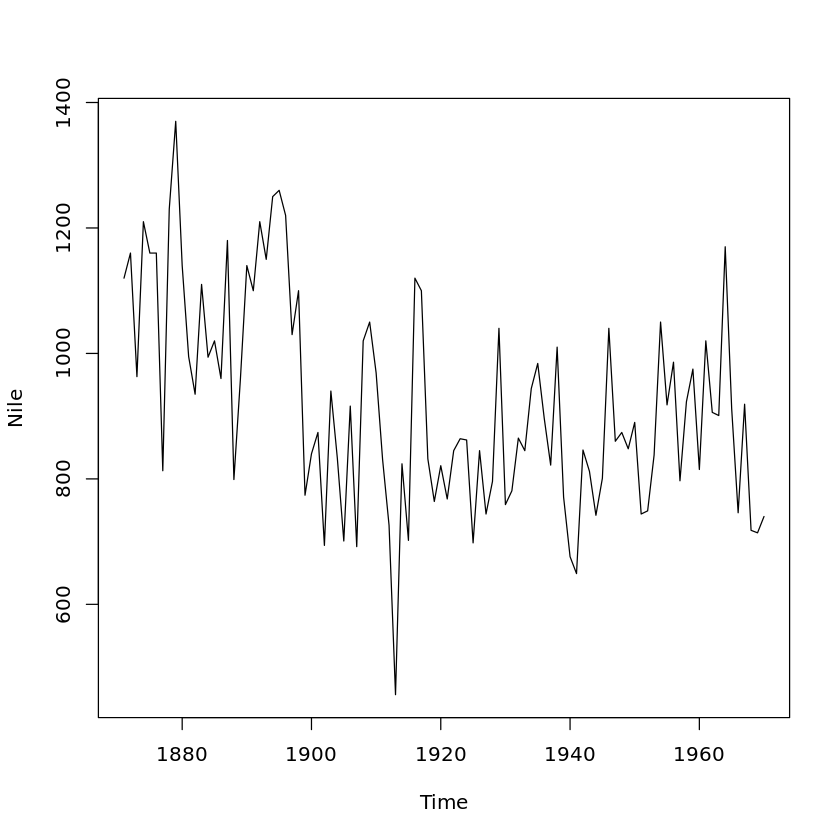

In [8]:
plot(Nile)

그림으로 보았을 때 나일강 연간 유입량 데이터는 비계절성을 띄는 데이터다.

아래 시계열 자료는 평균이 변화하는 추세를 보이므로 정상성을 만족하지 못하는 것으로 보인다.

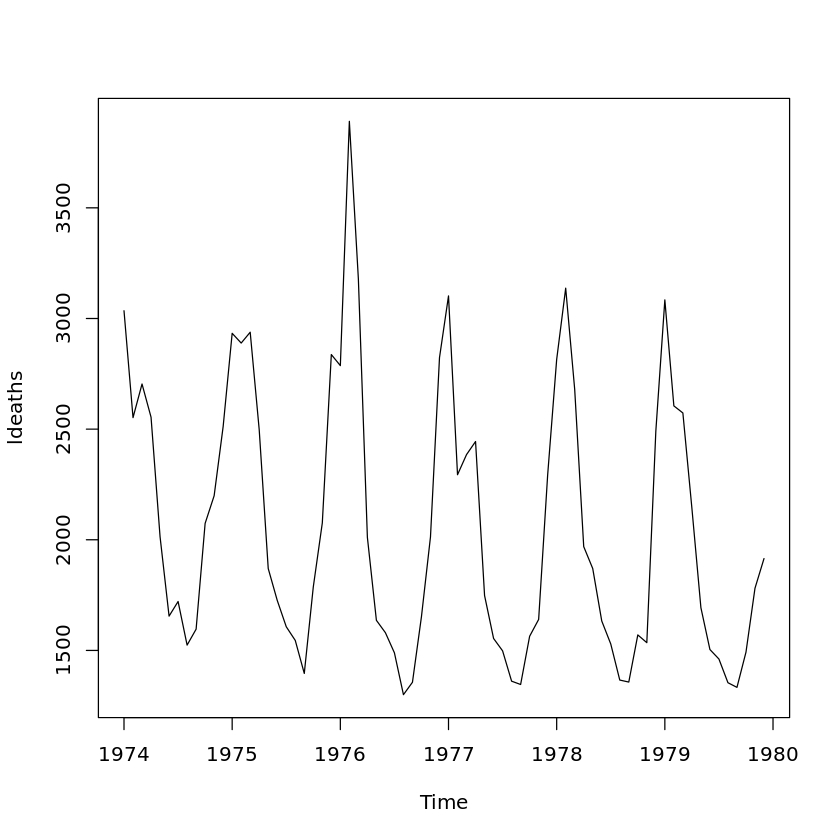

In [10]:
plot(ldeaths)

위 그림으로 볼 때 영국 내 폐질환 사망자 데이터는 년도 별로 계절성을 띄고 있는 것으로 보인다. 매 년 일정 주기별로 사망자 수가 늘었다 줄었다 하는 경향을 보인다.

### 분해시계열
계절성을 띄는 시계열 자료는 추세요인, 계절요인, 불규칙요인으로 구성된다.

R에서 decompose 함수를 사용하면 시계열 자료를 4가지 요인으로 분해할 수 있다.

In [11]:
ldeaths.decompose <- decompose(ldeaths)
ldeaths.decompose$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1974,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264
1975,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264
1976,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264
1977,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264
1978,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264
1979,873.7514,896.3347,687.5431,156.5847,-284.4819,-440.0236,-519.4236,-669.8736,-678.2236,-354.3069,-185.2069,517.3264


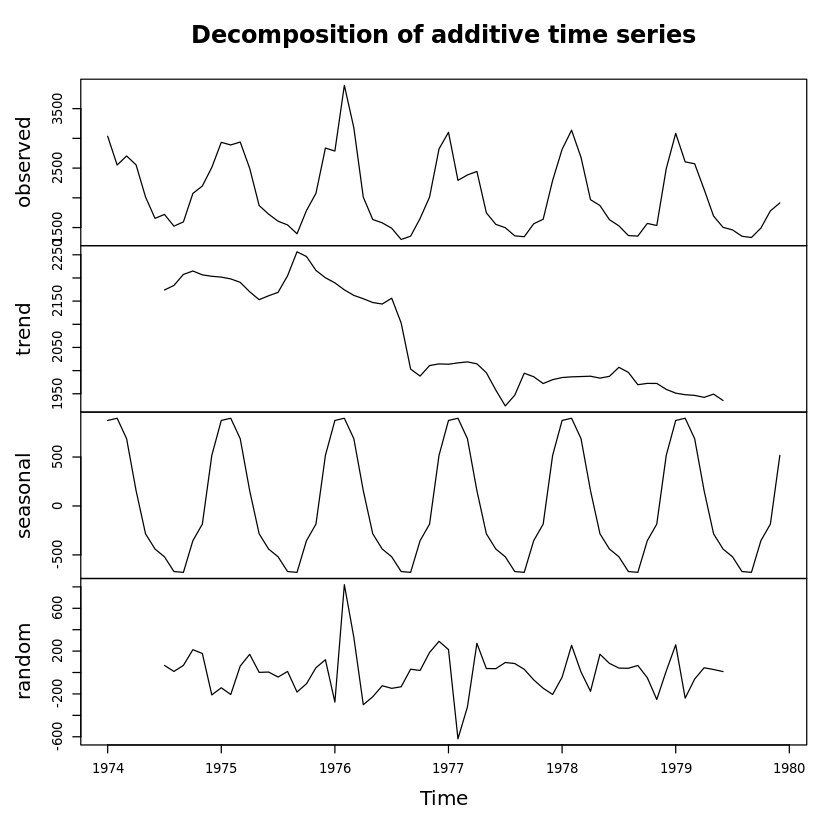

In [12]:
plot(ldeaths.decompose)

계절성을 띄는 시계열 자료는 계절요인을 추정해 그 값을 원 시계열자료에서 빼면 적절하게 조정할 수 있다. 즉 원 시계열 자료에서 계절요인을 제거한 후 그림을 그린다.

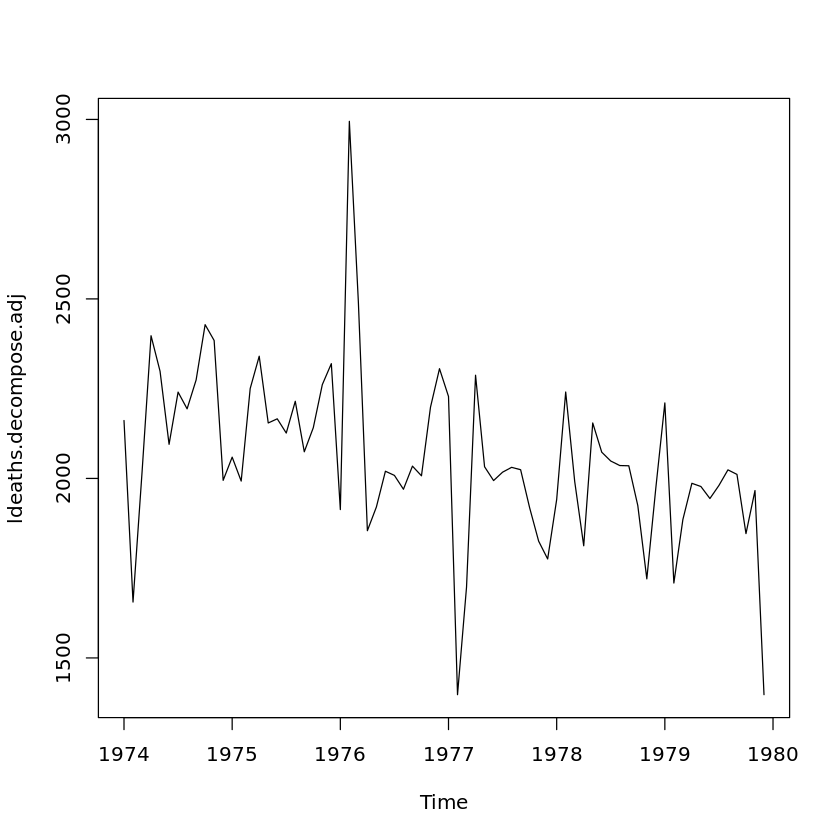

In [13]:
ldeaths.decompose.adj <- ldeaths - ldeaths.decompose$seasonal
plot(ldeaths.decompose.adj)

### ARIMA 모형
#### 차분
시간에 따라 평균이 일정하지 않은 비정상 시계열 자료를 diff 함수를 사용하여 차분을 한다.


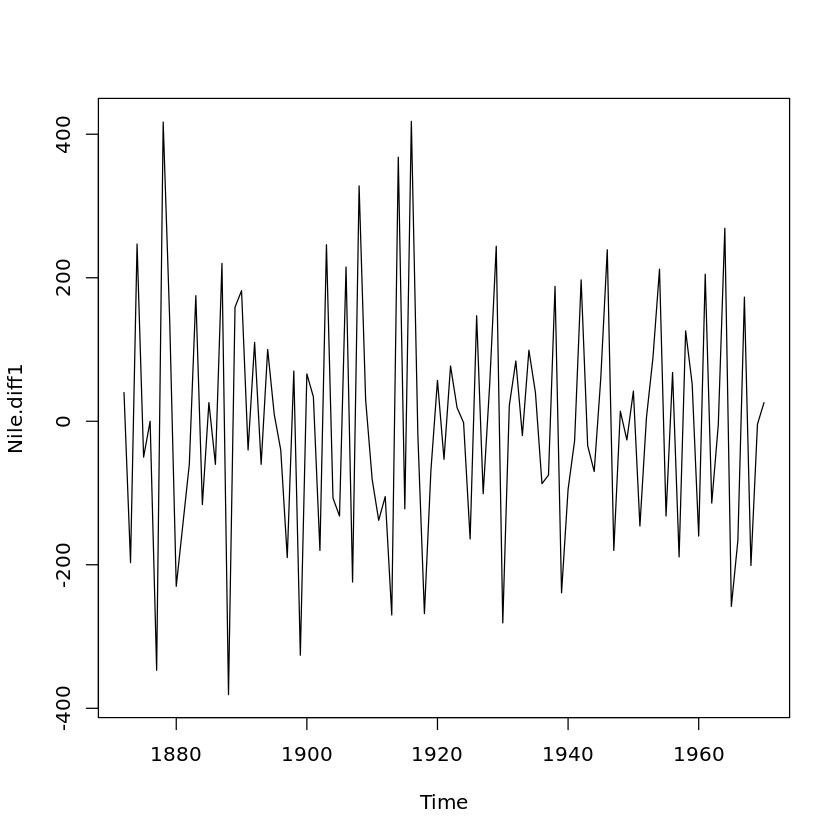

In [15]:
Nile.diff1 <- diff(Nile, differences=1)
plot(Nile.diff1)

1번 차분한 결과로는 아직 평균이 일정하지 않아 보인다. 차분을 2번 한 결과는 아래와 같다.

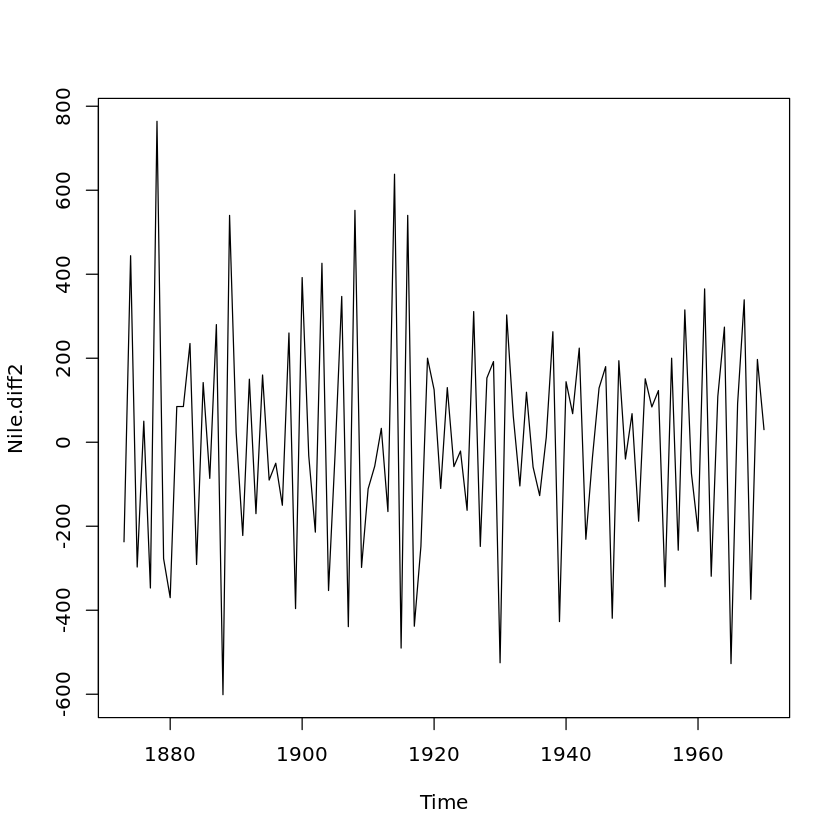

In [16]:
Nile.diff2 <- diff(Nile, differences=2)
plot(Nile.diff2)

2번 차분한 결과로 평균과 분산이 시간이 지남에 따라 평균과 분산이 어느정도 일정한 정상성을 만족하는 것으로 보인다.

#### ARIMA 모델 적합 및 결정
자기상관함수와 부분 자기상관함수를 통해 ARIMA 모형을 적합한 후에 최종 모형을 결정할 수 있다.

자기상관함수를 살펴보기 위해 acf 함수를 사용하여 2차 차분을 한 나일강 연간 유입량 시계열 자료의 자기상관함수 그래프를 그려보면 다음과 같다.


Autocorrelations of series ‘Nile.diff2’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.626  0.100  0.067 -0.072  0.017  0.074 -0.192  0.245 -0.079 -0.153 
    11     12     13     14     15     16     17     18     19     20 
 0.183 -0.106  0.062  0.010 -0.096  0.134 -0.134  0.091 -0.030  0.003 

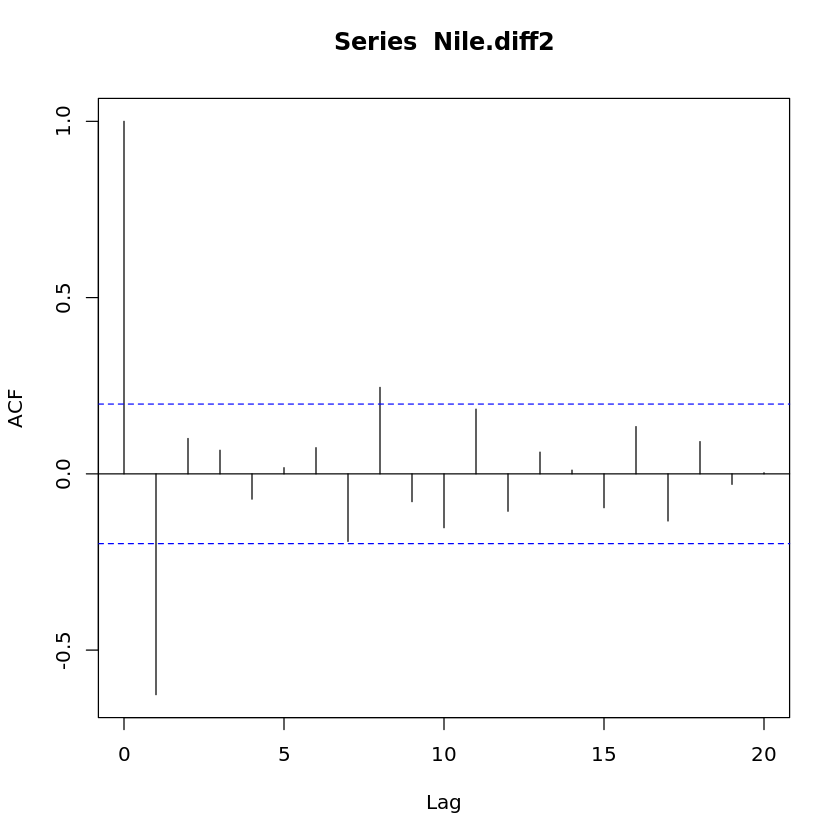

In [18]:
acf(Nile.diff2, lag.max=20)
acf(Nile.diff2, lag.max=20, plot=FALSE)

acf 함수의 lag 개수 20개로 설정했다.

lag 개수를 너무 많이 설정하면 자기상관함수 그래프를 보고 모형 식별을 위한 판단이 힘들기 때문에 적절한 값을 선택한다.
위 결과 자기상관함수가 lag=1, 8을 제외하고 모두 신뢰구간안에 있는 것을 확인할 수 있다.

다음으로 부분자기상관함수 그래프를 그려보면 아래와 같다.


Partial autocorrelations of series ‘Nile.diff2’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.626 -0.481 -0.302 -0.265 -0.273 -0.112 -0.353 -0.213  0.038 -0.120 -0.117 
    12     13     14     15     16     17     18     19     20 
-0.197 -0.132 -0.055 -0.109  0.022 -0.184 -0.067 -0.037 -0.024 

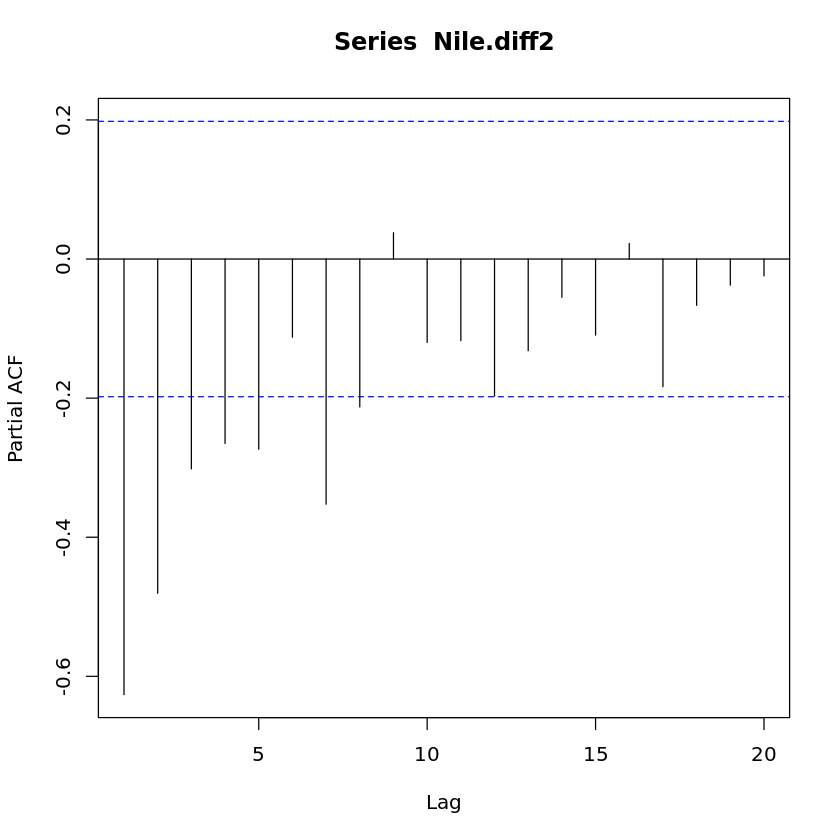

In [20]:
pacf(Nile.diff2, lag.max=20)
pacf(Nile.diff2, lag.max=20, plot=FALSE)

부분자기상관함수가 lag=1~8에서 신뢰구간을 넘어서 음의 값을 가지고, lag=9에서 절단된 것을 볼 수 있다.
이와 같이 자기 상관함수와 부분자기상관함수의 그래프를 종합해보면 다음과 같은 ARIMA 모형이 존재하게 된다.
* ARMA(8,0) : 부분자기상관함수 그래프에서 lag=9에서 절단되었음
* ARMA(0,1) : 자기상관함수 그래프에서 lag=2에서 절단되었음
* ARMA(p,q) : AR 모형과 MA 모형을 혼합하여 모형을 식별하고 결정해야 함

#### ARIMA 모형을 이용한 예측
시계열 자료에 대해 적절한 ARIMA 모형이 결정되었다면, ARIMA 모형을 통해 미래의 수치 값을 예측할 수 있다.

나일강 연간 유입량 시계열 자료의 모형은 ARIMA(1,1,1)모형으로 결정되었다. 
이 시계열 자료를 ARIMA(1,1,1) 모형에 적합한다.

In [22]:
Nile.arima <- arima(Nile, order=c(1,1,1))
Nile.arima


Call:
arima(x = Nile, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 19769:  log likelihood = -630.63,  aic = 1267.25

데이터를 모형에 적합한 후 forecast 패키지의 forecast 함수를 사용하여 미래의 수치 값을 예측한다.
h=10은 10개 년도만 예측한다는 의미이다.

In [24]:
library(forecast)
Nile.forecasts <- forecast(Nile.arima, h=10)
Nile.forecasts

     Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
1971       816.1813 635.9909  996.3717 540.6039 1091.759
1972       835.5596 642.7830 1028.3363 540.7332 1130.386
1973       840.4889 643.5842 1037.3936 539.3492 1141.629
1974       841.7428 642.1115 1041.3741 536.4331 1147.053
1975       842.0617 640.0311 1044.0923 533.0826 1151.041
1976       842.1429 637.8116 1046.4741 529.6452 1154.641
1977       842.1635 635.5748 1048.7522 526.2134 1158.114
1978       842.1687 633.3514 1050.9861 522.8102 1161.527
1979       842.1701 631.1488 1053.1914 519.4408 1164.899
1980       842.1704 628.9682 1055.3727 516.1057 1168.235

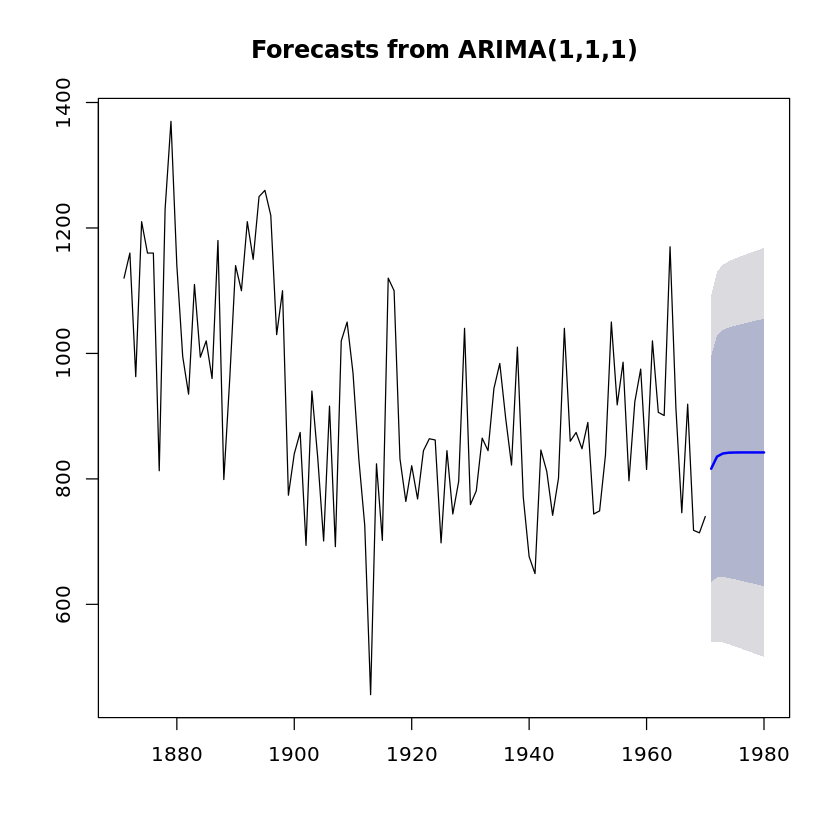

In [26]:
plot(Nile.forecasts)